In [1]:
import numpy as np
import matplotlib.pyplot as plt


## 1(a) Coupled Radioactive Decay: A ⇌ B

There are  two radioactive species **A** and **B** such that:

- A decays into B with time constant **τₐ**
- B decays into A with time constant **τᵦ**


### The diffrential equations  for the same are:

$$
\begin{aligned}
\frac{dN_A}{dt} &= -\frac{N_A}{\tau_A} + \frac{N_B}{\tau_B} \\
\frac{dN_B}{dt} &= \frac{N_A}{\tau_A} - \frac{N_B}{\tau_B}
\end{aligned}
$$

### Initial Conditions

$$
N_A(0) = 100,\quad N_B(0) = 0
$$

The equations are solved numerically using **Euler’s method** for different ratios  

 We have taken the ratios as follows:  
$$
\frac{\tau_A}{\tau_B} = 0.2,\ 1.0,\ 2.2
$$





In [ ]:
def euler_coupled(tmax, dt, tauA, tauB):
    t = np.arange(0, tmax, dt)
    NA = np.zeros(len(t))
    NB = np.zeros(len(t))
    
    NA[0] = 100
    NB[0] = 0
    
    for i in range(len(t) - 1):
        dNA = -NA[i]/tauA + NB[i]/tauB
        dNB =  NA[i]/tauA - NB[i]/tauB
        
        NA[i+1] = NA[i] + dt * dNA
        NB[i+1] = NB[i] + dt * dNB
    
    return t, NA, NB


Given Below is the code for plots for different values of the ratios:

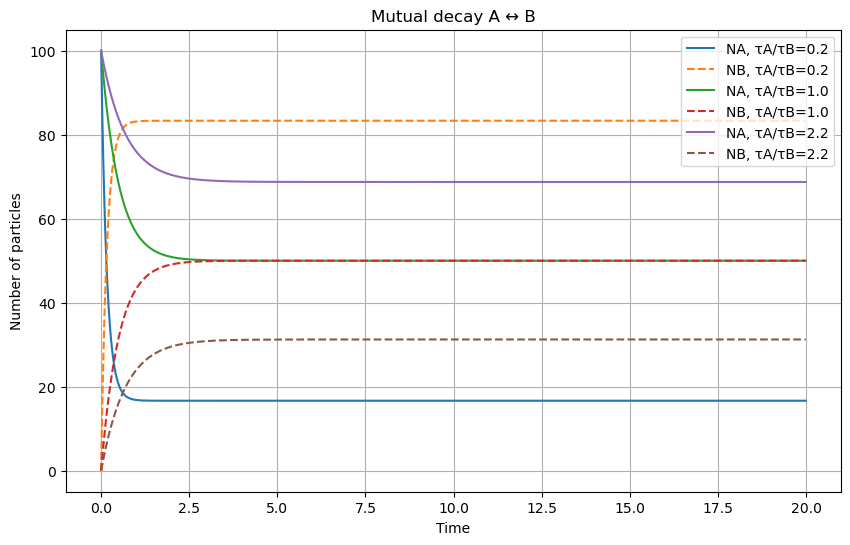

In [ ]:
ratios = [0.2, 1.0, 2.2]
tmax = 20
dt = 0.01

plt.figure(figsize=(10, 6))

for r in ratios:
    tauA = r
    tauB = 1
    t, NA, NB = euler_coupled(tmax, dt, tauA, tauB)
    
    plt.plot(t, NA, label=f"NA, τA/τB={r}")
    plt.plot(t, NB, '--', label=f"NB, τA/τB={r}")

plt.xlabel("Time")
plt.ylabel("Number of particles")
plt.title("Mutual decay A ↔ B")
plt.legend()
plt.grid()
plt.show()


### Results and Observations


- The populations of species **A** and **B** change with time and eventually approach **constant values**.
- The total number of particles remains conserved throughout the evolution.

The long-time behavior  depends on the ratio of the time constants:

$$
\frac{\tau_A}{\tau_B}
$$

Case 1: \( \tau_A / \tau_B = 0.2 \)

- Species **A** decays faster than species **B**.
- The equilibrium population of **A** is smaller compared to **B**.



 Case 2: \( \tau_A / \tau_B = 1.0 \)

- Both species decay at the same rate.
- The system reaches a **symmetric equilibrium** where the populations of A and B are comparable.



 Case 3: \( \tau_A / \tau_B = 2.2 \)

- Species **A** decays more slowly than species **B**.
- The equilibrium population of **A** is larger than that of **B**.



 Conclusion

The system reaches a **non-zero equilibrium** because particles continuously convert between species A and B.  
The ratio of decay time constants determines the final equilibrium distribution of the two species.


### 1(b) One-Way Radioactive Decay: A → B → Lost

In this case, the radioactive decay is **one-way**:

- Species **A** decays into **B**
- Species **B** also decays further and is lost
- There is **no reverse decay** from B to A

Both species are assumed to have the same time constant.



Governing Differential Equations

$$
\begin{aligned}
\frac{dN_A}{dt} &= -N_A \\
\frac{dN_B}{dt} &= N_A - N_B
\end{aligned}
$$



 Initial Conditions

$$
N_A(0) = 100,\quad N_B(0) = 0
$$



 Numerical Method

The above system of differential equations is solved using **Euler’s method** with:

- Time step size:

$$
dt = 0.01
$$

- Total simulation time:

$$
t_{\max} = 20
$$


 The time evolution of the populations $$ N_A(t) and  N_B(t)$$  is computed iteratively. 






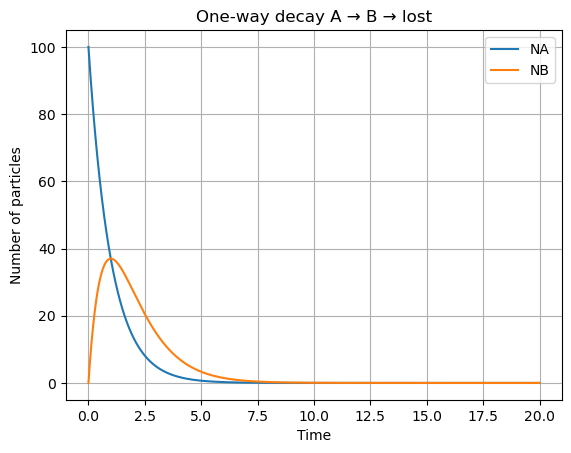

In [ ]:
def euler_oneway(tmax, dt):
    t = np.arange(0, tmax, dt)
    NA = np.zeros(len(t))
    NB = np.zeros(len(t))
    
    NA[0] = 100
    NB[0] = 0
    
    for i in range(len(t) - 1):
        NA[i+1] = NA[i] - dt * NA[i]
        NB[i+1] = NB[i] + dt * (NA[i] - NB[i])
        
    return t, NA, NB

t, NA, NB = euler_oneway(20, 0.01)

plt.plot(t, NA, label="NA")
plt.plot(t, NB, label="NB")
plt.xlabel("Time")
plt.ylabel("Number of particles")
plt.title("One-way decay A → B → lost")
plt.legend()
plt.grid()
plt.show()


### Results and Observation

- The population of **A** decreases exponentially with time.
- The population of **B** initially increases as A decays into B.
- Eventually, **both populations decay to zero**.

This happens because there is **no feedback mechanism** converting B back into A, unlike the coupled decay case.